# Week5 - Lab

* Assign X, y
* Train-test split
* Visualize & speculate on training dataset
* Train a logistic regression model
* Evaluate the model, roc score
* Explain findings

### Importing all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification?select=gender.csv
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/gender.csv').iloc[:,:-1]
df.columns = df.columns.str.strip()
df.Gender = df.Gender.str.strip()

<AxesSubplot:>

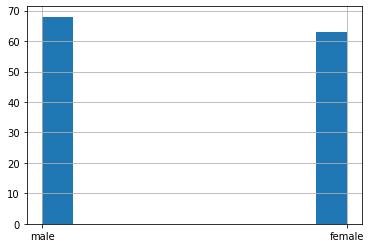

In [2]:
df.Gender.hist() # histogram of gender column

In [3]:
df.head() # view the head of the dataset

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


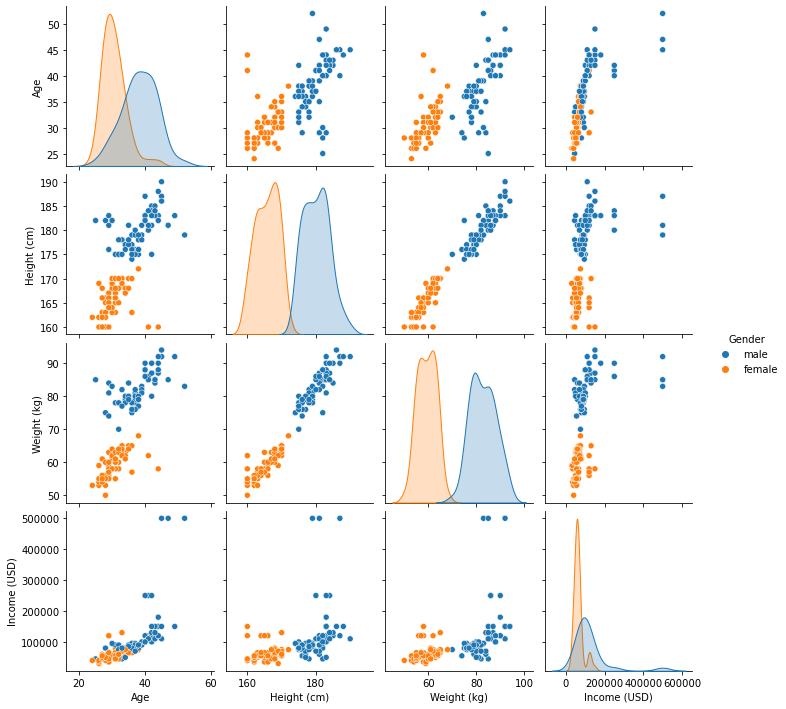

In [4]:
sns.pairplot(df, hue='Gender') # get the pairplot of dataset with hue gender

### From the pairplot, it can be concluded that the values are linearlly separable. So, this can be the best dataset to fit the logistic regression model 

### Assign X and y

In [5]:
y = df['Gender'] # Target column is Gender
X = df[[x for x in df.columns if x != 'Gender']] # Columns except the target column

### Dividing features into numerical and categorical 

In [6]:
numerical_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(exclude=['number']).columns.tolist()

# Print the numerical and categorical features
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['Age', 'Height (cm)', 'Weight (kg)', 'Income (USD)']
Categorical Features: ['Occupation', 'Education Level', 'Marital Status', 'Favorite Color']


### Create the dummy variables for the categorical features of X columns

In [7]:
X = pd.get_dummies(X, columns = categorical_features)

In [8]:
X.info() # Get the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Age                                  131 non-null    int64
 1   Height (cm)                          131 non-null    int64
 2   Weight (kg)                          131 non-null    int64
 3   Income (USD)                         131 non-null    int64
 4   Occupation_ Accountant               131 non-null    uint8
 5   Occupation_ Analyst                  131 non-null    uint8
 6   Occupation_ Architect                131 non-null    uint8
 7   Occupation_ Business Analyst         131 non-null    uint8
 8   Occupation_ Business Consultant      131 non-null    uint8
 9   Occupation_ CEO                      131 non-null    uint8
 10  Occupation_ Doctor                   131 non-null    uint8
 11  Occupation_ Engineer                 131 non-null    uint8

### Do the train and test split

### Split the dataset into train and test with a proportion of 80 and 20

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 104
Test samples: 27


### The training samples is 104 and test samples is 27

### Visualize & speculate on training dataset

In [10]:
y_train.value_counts() # Get the count of y_train dataset

male      54
female    50
Name: Gender, dtype: int64

**Female is 54 and male is 50.**

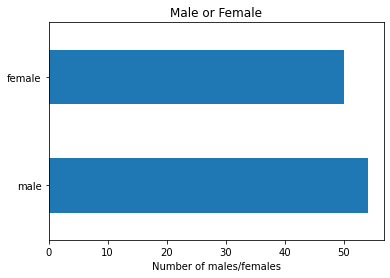

In [11]:
y_train.value_counts().plot.barh()
plt.title('Male or Female')
plt.xlabel('Number of males/females')
plt.show()

In [12]:
X_train.describe()

,Age,Height (cm),Weight (kg),Income (USD),Occupation_ Accountant,Occupation_ Analyst,Occupation_ Architect,Occupation_ Business Analyst,Occupation_ Business Consultant,Occupation_ CEO,...,Favorite Color_ Yellow,Favorite Color_Black,Favorite Color_Blue,Favorite Color_Green,Favorite Color_Grey,Favorite Color_Orange,Favorite Color_Pink,Favorite Color_Purple,Favorite Color_Red,Favorite Color_Yellow
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0,104.000000,...,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,34.615385,173.115385,71.423077,94519.230769,0.019231,0.028846,0.019231,0.009615,0.0,0.028846,...,0.057692,0.048077,0.086538,0.105769,0.028846,0.067308,0.009615,0.096154,0.086538,0.076923
std,5.971303,7.917423,12.477313,79459.702282,0.138000,0.168185,0.138000,0.098058,0.0,0.168185,...,0.234290,0.214965,0.282519,0.309031,0.168185,0.251767,0.098058,0.296230,0.282519,0.267760
min,24.000000,160.000000,50.000000,35000.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,166.000000,60.000000,55000.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,175.000000,75.500000,75000.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,39.000000,180.250000,83.000000,100000.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52.000000,187.000000,92.000000,500000.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 85 to 62
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Age                                  104 non-null    int64
 1   Height (cm)                          104 non-null    int64
 2   Weight (kg)                          104 non-null    int64
 3   Income (USD)                         104 non-null    int64
 4   Occupation_ Accountant               104 non-null    uint8
 5   Occupation_ Analyst                  104 non-null    uint8
 6   Occupation_ Architect                104 non-null    uint8
 7   Occupation_ Business Analyst         104 non-null    uint8
 8   Occupation_ Business Consultant      104 non-null    uint8
 9   Occupation_ CEO                      104 non-null    uint8
 10  Occupation_ Doctor                   104 non-null    uint8
 11  Occupation_ Engineer                 104 non-null    uint8

In [14]:
X_train.corr() # for finding the correlation

,Age,Height (cm),Weight (kg),Income (USD),Occupation_ Accountant,Occupation_ Analyst,Occupation_ Architect,Occupation_ Business Analyst,Occupation_ Business Consultant,Occupation_ CEO,...,Favorite Color_ Yellow,Favorite Color_Black,Favorite Color_Blue,Favorite Color_Green,Favorite Color_Grey,Favorite Color_Orange,Favorite Color_Pink,Favorite Color_Purple,Favorite Color_Red,Favorite Color_Yellow
Age,1.000000,0.695260,0.748742,0.664006,-0.155883,-0.037182,0.197573,0.089282,NaN,0.388181,...,0.071532,0.143126,-0.089424,-0.040876,-0.114521,0.030303,0.039539,0.180281,0.060206,-0.127050
Height (cm),0.695260,1.000000,0.977764,0.428877,-0.170882,0.136007,0.157895,0.173632,NaN,0.201627,...,0.006844,0.167842,-0.047911,-0.060589,-0.104599,0.000937,0.073589,0.227037,0.017195,-0.127878
Weight (kg),0.748742,0.977764,1.000000,0.458497,-0.179564,0.137550,0.175660,0.147412,NaN,0.211575,...,0.014817,0.180568,-0.054554,-0.052004,-0.144668,-0.006062,0.075995,0.212158,0.003284,-0.134794
Income (USD),0.664006,0.428877,0.458497,1.000000,-0.078834,-0.057071,0.045121,0.031750,NaN,0.883734,...,0.144920,-0.004318,-0.067326,-0.055239,-0.089763,0.018619,-0.011861,0.092725,-0.015428,-0.116888
Occupation_ Accountant,-0.155883,-0.170882,-0.179564,-0.078834,1.000000,-0.024133,-0.019608,-0.013797,NaN,-0.024133,...,-0.034648,-0.031469,-0.043100,-0.048158,-0.024133,-0.037616,-0.013797,-0.045672,-0.043100,-0.040423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Favorite Color_Orange,0.030303,0.000937,-0.006062,0.018619,-0.037616,-0.046298,-0.037616,-0.026469,NaN,-0.046298,...,-0.066470,-0.060371,-0.082684,-0.092389,-0.046298,1.000000,-0.026469,-0.087619,-0.082684,-0.077548
Favorite Color_Pink,0.039539,0.073589,0.075995,-0.011861,-0.013797,-0.016982,-0.013797,-0.009709,NaN,-0.016982,...,-0.024381,-0.022144,-0.030328,-0.033887,-0.016982,-0.026469,1.000000,-0.032138,-0.030328,-0.028444
Favorite Color_Purple,0.180281,0.227037,0.212158,0.092725,-0.045672,-0.056213,-0.045672,-0.032138,NaN,-0.056213,...,-0.080705,-0.073300,-0.100391,-0.112174,-0.056213,-0.087619,-0.032138,1.000000,-0.100391,-0.094155
Favorite Color_Red,0.060206,0.017195,0.003284,-0.015428,-0.043100,-0.053047,-0.043100,-0.030328,NaN,-0.053047,...,-0.076159,-0.069171,-0.094737,-0.105856,-0.053047,-0.082684,-0.030328,-0.100391,1.000000,-0.088852


### Train a logistic regression model

**Train the logistic regression model and predict the probabilities of the data and view the five predictions.**

In [15]:
from sklearn.linear_model import LogisticRegression
model_train = LogisticRegression(penalty=None).fit(X_train,y_train)
y_predictions = model_train.predict_proba(X_test)
y_predictions[:5]

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.21502557e-02, 9.77849744e-01],
       [1.00000000e+00, 8.30343741e-28],
       [0.00000000e+00, 1.00000000e+00]])

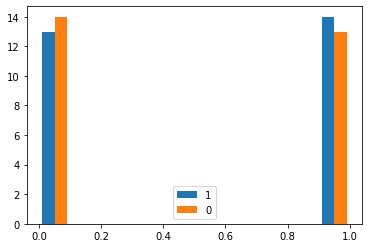

In [16]:
plt.hist(y_predictions)
plt.legend(['1', '0'])
plt.show()

**Plot the histogram of the predictions. The predicted values are mostly around 0 and 1 values which can be treated as the best model.**

###  Evaluate the model, roc score

**Get the roc score.**

In [17]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_predictions[:,1])

1.0

**The ROC AUC score is 1.0 which means I can say that this model perfectly classifies the positive and negative class points.**

In [18]:
from sklearn.metrics import confusion_matrix

y_predictions = model_train.predict(X_test)

print(confusion_matrix(y_test, y_predictions))

[[13  0]
 [ 1 13]]


**From the confusion matrix, it is clear that the values are in true positive and true negative, so it can be concluded as the best model.**

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

      female       0.93      1.00      0.96        13
        male       1.00      0.93      0.96        14

    accuracy                           0.96        27
   macro avg       0.96      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



### Explain findings

**First, the dataset is divided into X and y. Then, the data is splitted into train and test. From the pairplot, it can be concluded that the data is linearlly separable and it is best data to fit the model. Dummies are created for the categorical features using get_dummies function. Training logistic regression model and predicting the probabilities concludes the model is the best one for this dataset. Confusion Matrix and classification report is also found. From them, we have an accuracy of 96 which is good for any model to predict.**